# Scan OHP aerosols during one year

- Author :Sylvie Dagoret-Campagne
- affiliation : LAL,IN2P3,CNRS
- organization : LSST 

- creation : Tuesday 22th September 2016



In [2]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import os

import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py

from mpl_toolkits.basemap import Basemap


In [4]:
#from __future__ import print_function
import datetime
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [5]:
mondays=WeekdayLocator(MONDAY)

In [6]:
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [7]:
year_number=2016   # choose the month number
month_start=0      # choose first month
month_stop=7      # choose last month
month_numbers=np.arange(month_start,month_stop+1)
month_stringnumber=['01','02','03','04','05','06','07','08','09','10','11','12']
number_of_monthes=month_numbers.shape[0]

In [8]:
dates= [datetime.date(year_number, m, 1) for m in range(month_start+1,month_stop+2)]

In [9]:

path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00'
fullpath_root=os.path.join(os.path.join(path_root,str(year_number)),'hdf5')

In [10]:
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' # 

### Specify Input Filenames
- day-  : CAL_LID_L3_APro_AllSky-Standard-V3-00.2006-06D.h5
- night : CAL_LID_L3_APro_AllSky-Standard-V3-00.2006-06N.h5

In [11]:
dayfile_extension= [ str(year_number)+'-'+month_stringnumber[ix]+'D'+'.h5' for ix in month_numbers]

In [12]:
nightfile_extension= [ str(year_number)+'-'+month_stringnumber[ix]+'N'+'.h5' for ix in month_numbers]

In [13]:
dayfiles_fullname=[os.path.join(fullpath_root,filename_base+'.'+dayfile_extension[ix]) for ix in month_numbers ]

In [14]:
nightfiles_fullname=[os.path.join(fullpath_root, filename_base+'.'+nightfile_extension[ix]) for ix in month_numbers]

In [15]:
# /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2015/hdf5
#dayfiles_fullname

### defines pdf output filename containing plots

In [16]:
filename_pdf='aerosol_worldmap_year_'+str(year_number)+'.pdf'

In [17]:
pp = PdfPages(filename_pdf)

### CTIO Data 2007 and 2008 from the article

In [18]:
data_dates=[datetime.date(2007, 4, 24), datetime.date(2007,11, 2), datetime.date(2007,11, 3), datetime.date(2008,4,24), 
            datetime.date(2008,4,25),datetime.date(2008,4,26)]
data_aod_675=np.array([0.015,0.039,0.056,0.012,0.008,0.008])   # optical depth at 630 nm
data_alpha=np.array([0.94,1.7,0.95,0.5,1.1,1.5])
multipliative_factor=np.power((675./532.),data_alpha)
multipliative_factor

array([ 1.25080213,  1.49887922,  1.25378345,  1.12640889,  1.29936557,
        1.42918421])

In [19]:
data_aod=multipliative_factor*data_aod_675
data_aod

array([ 0.01876203,  0.05845629,  0.07021187,  0.01351691,  0.01039492,
        0.01143347])

### OHP site

In [20]:

Longitude_ohp=5.71222222222 # deg
Latitude_ohp=43.9316666667  # deg
Altitude_ohp=650.           # m 
LongMin=-10
LongMax=60
LatMin=30
LatMax=60

In [21]:
# book containers for aerosols
all_aod_day=np.zeros(number_of_monthes)  # container for all AOD at OHP
dust_aod_day=np.zeros(number_of_monthes)  # container for all AOD at OHP
polluteddust_aod_day=np.zeros(number_of_monthes)  # container for all AOD at OHP
smoke_aod_day=np.zeros(number_of_monthes)  # container for all AOD at OHP

all_aod_night=np.zeros(number_of_monthes)  # container for all AOD at OHP
dust_aod_night=np.zeros(number_of_monthes)  # container for all AOD at OHP
polluteddust_aod_night=np.zeros(number_of_monthes)  # container for all AOD at OHP
smoke_aod_night=np.zeros(number_of_monthes)  # container for all AOD OHP

## work on first file, reading the data and showing the map for a first test


It set also variables usefull for the loop

In [22]:
fileindex=6

In [23]:
h5f = h5py.File(dayfiles_fullname[fileindex], "r")  # file on which one works

In [24]:
longitude=h5f['Longitude_Midpoint']   # shape =(1,72)
all_longitude=longitude[0,:]    # coordinates for X

In [25]:
latitude=h5f['Latitude_Midpoint']     # shape = (1,85)
all_latitude=latitude[0,:]      # coordinate for Y

In [26]:
X,Y=np.meshgrid(all_longitude,all_latitude) # defines the mesh for the map

##### extract the map bin corresponding to the OHP site

In [27]:
ohp_long_indexes=np.where(np.logical_and(all_longitude>=Longitude_ohp-2.5, all_longitude<=Longitude_ohp+2.5))
ohp_lat_indexes=np.where(np.logical_and(all_latitude>=Latitude_ohp-1, all_latitude<=Latitude_ohp+1))
ohp_lat_index=ohp_lat_indexes[0]
ohp_long_index=ohp_long_indexes[0]

In [28]:
print "OHP site  ", "lat=",ohp_lat_index,"long=",ohp_long_index

OHP site   lat= [64] long= [37]


In [29]:
aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
aod_arr=np.array(aod_mean)  # convert in a numpy array
aod_mean_clean=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data    

In [30]:
h5f.close()

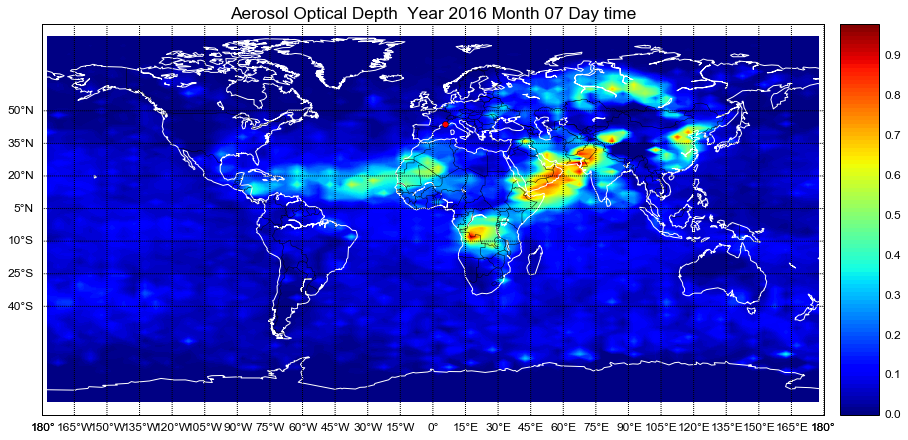

In [31]:
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines(color="white")
map.drawcountries(color="black")
img=map.contourf(X, Y, aod_mean_clean,100)
map.colorbar(img,"right", size="5%", pad="2%")

map.drawparallels(np.arange(-40,61.,15.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,180.,15.),labels=[True,False,False,True])
xpt_ohp,ypt_ohp = map(Longitude_ohp,Latitude_ohp)

map.plot(xpt_ohp,ypt_ohp,'ro')  # plot a red dot there
#plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
title = "Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[fileindex])
plt.title(title)
#plt.savefig(pp, format='pdf')
plt.show()

## Loop to Open files, reading the data and showing the map

In [32]:
for imonth in month_numbers:    

    
    
    if imonth == 1 : # skip february
        continue
    
    #message= ">>>> Year %d Month %s Day File %s : " %(year_number,month_stringnumber[imonth],dayfiles_fullname[imonth])    
    #print message
    
    # Start with day time
    #---------------------
    print dayfiles_fullname[imonth]
    h5fday = h5py.File(dayfiles_fullname[imonth], "r")  # file on which one works
    
    #all aerosols
    #------------
    aod_mean=h5fday['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_arr=np.array(aod_mean)  # convert in a numpy array
    aod_mean_clean_day=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data

    # dust aerosols
    #--------------
    aod_dust=h5fday['AOD_Mean_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    dust_arr=np.array(aod_dust)  # convert in a numpy array
    aod_dust_clean_day=np.where(np.logical_and(dust_arr>0,dust_arr<1),dust_arr, 0 )  # clean the aod from creazy data

    # dust polluted aerosols
    #-----------------------
    aod_polluteddust=h5fday['AOD_Mean_Polluted_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    polluteddust_arr=np.array(aod_polluteddust)  # convert in a numpy array
    aod_polluteddust_clean_day=np.where(np.logical_and(polluteddust_arr>0,polluteddust_arr<1),polluteddust_arr, 0 )  # clean the aod from creazy data
 
    # smoke aerosols
    #----------------
    aod_smoke=h5fday['AOD_Mean_Smoke']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    smoke_arr=np.array(aod_smoke)  # convert in a numpy array
    aod_smoke_clean_day=np.where(np.logical_and(smoke_arr>0,smoke_arr<1),smoke_arr, 0 )  # clean the aod from creazy data

    #close input file
    h5fday.close()
    
    # extract the info for OHP
    all_aod_day[imonth]=aod_mean_clean_day[ohp_lat_index,ohp_long_index]  
    dust_aod_day[imonth]=aod_dust_clean_day[ohp_lat_index,ohp_long_index]  
    polluteddust_aod_day[imonth]=aod_polluteddust_clean_day[ohp_lat_index,ohp_long_index] 
    smoke_aod_day[imonth]=aod_smoke_clean_day[ohp_lat_index,ohp_long_index] 

    
    
    
    # Start with night time
    #---------------------
    
    #message= ">>>> Year %d Month %s Night File %s : " %(year_number,month_stringnumber[imonth],nightfiles_fullname[imonth])
    #print message
    
    h5fnight = h5py.File(nightfiles_fullname[imonth], "r")  # file on which one works
   
    #all aerosols
    #------------
    aod_mean=h5fnight['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_arr=np.array(aod_mean)  # convert in a numpy array
    aod_mean_clean_night=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data

    # dust aerosols
    #--------------
    aod_dust=h5fnight['AOD_Mean_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    dust_arr=np.array(aod_dust)  # convert in a numpy array
    aod_dust_clean_night=np.where(np.logical_and(dust_arr>0,dust_arr<1),dust_arr, 0 )  # clean the aod from creazy data

    # dust polluted aerosols
    #-----------------------
    aod_polluteddust=h5fnight['AOD_Mean_Polluted_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    polluteddust_arr=np.array(aod_polluteddust)  # convert in a numpy array
    aod_polluteddust_clean_night=np.where(np.logical_and(polluteddust_arr>0,polluteddust_arr<1),polluteddust_arr, 0 )  # clean the aod from creazy data
 
    # smoke aerosols
    #----------------
    aod_smoke=h5fnight['AOD_Mean_Smoke']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    smoke_arr=np.array(aod_smoke)  # convert in a numpy array
    aod_smoke_clean_night=np.where(np.logical_and(smoke_arr>0,smoke_arr<1),smoke_arr, 0 )  # clean the aod from creazy data 
    
    
    h5fnight.close()
  

    # extract the info for LSST
    all_aod_night[imonth]=aod_mean_clean_night[ohp_lat_index,ohp_long_index]  
    dust_aod_night[imonth]=aod_dust_clean_night[ohp_lat_index,ohp_long_index]  
    polluteddust_aod_night[imonth]=aod_polluteddust_clean_night[ohp_lat_index,ohp_long_index] 
    smoke_aod_night[imonth]=aod_smoke_clean_night[ohp_lat_index,ohp_long_index] 
    
    

/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-01D.h5
/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-03D.h5
/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-04D.h5
/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-05D.h5
/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-06D.h5
/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5/CAL_LID_L3_APro_AllSky-Standar

In [33]:
all_aod_night

array([ 0.03853263,  0.        ,  0.09658556,  0.05838883,  0.0336515 ,
        0.07274366,  0.15727603,  0.12359647])

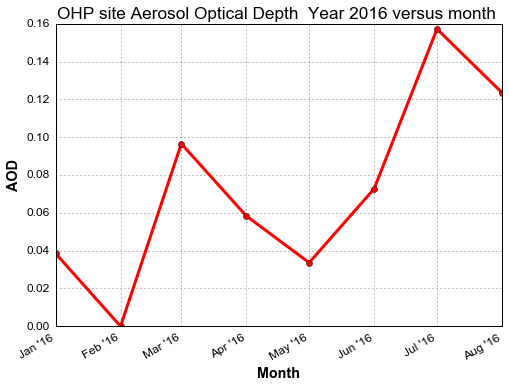

In [34]:
fig, ax = plt.subplots()
ax.plot_date(dates, all_aod_night,'ro-',label='all aerosols day',linewidth=3)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(mondays)

title= "OHP site Aerosol Optical Depth  Year %d versus month " % year_number

ax.set_ylabel('AOD')
ax.set_xlabel('Month')
plt.title(title)

#ax.autoscale_view()

ax.grid(True)

fig.autofmt_xdate()

#ax.set_xlim(['2006-11-30 00:00:00','2008-01-01 00:00:00'])

#plt.legend(loc='best')
plt.show()

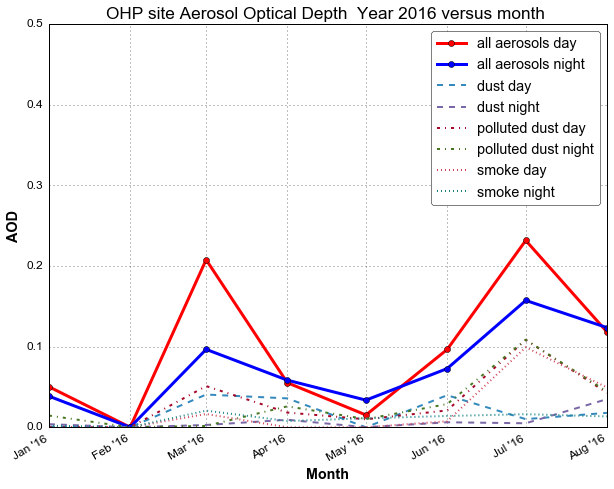

In [35]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)


ax.plot_date(dates, all_aod_day,'ro-',label='all aerosols day',linewidth=3)
ax.plot_date(dates, all_aod_night,'bo-',label='all aerosols night',linewidth=3)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(mondays)

ax.plot_date(dates,dust_aod_day,'--',label='dust day',linewidth=2)
ax.plot_date(dates,dust_aod_night,'--',label='dust night',linewidth=2)


ax.plot_date(dates,polluteddust_aod_day,'-.',label='polluted dust day',linewidth=2)
ax.plot_date(dates,polluteddust_aod_night,'-.',label='polluted dust night',linewidth=2)



ax.plot_date(dates,smoke_aod_day,':',label='smoke day',linewidth=2)
ax.plot_date(dates,smoke_aod_night,':',label='smoke night',linewidth=2)


#ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

title= "OHP site Aerosol Optical Depth  Year %d versus month " % year_number
figfilename="OHPAODvsMonthY%d.pdf" %year_number

ax.set_ylabel('AOD')
ax.set_xlabel('Month')

ax.grid(True)
fig.autofmt_xdate()

plt.title(title)
#plt.lines.Line2D.set_linewidth(2.)
plt.ylim(0,0.5)
plt.legend(loc='best')
plt.savefig(figfilename, bbox_inches='tight')

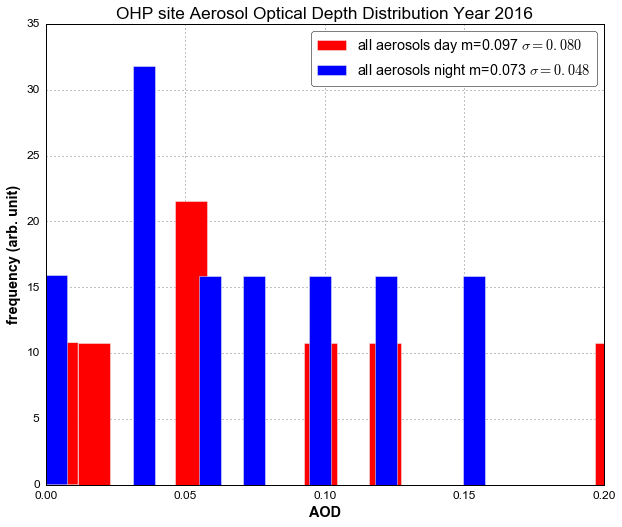

In [36]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)

themean_aod_day=all_aod_day.mean()
themean_aod_night=all_aod_night.mean()
therms_aod_day=all_aod_day.std()
therms_aod_night=all_aod_night.std()

label_day='all aerosols day m=%4.3f $\sigma =%4.3f $' % (themean_aod_day,therms_aod_day)
label_night='all aerosols night m=%4.3f $\sigma =%4.3f $' % (themean_aod_night,therms_aod_night)

ax.hist(all_aod_day,bins=20, facecolor='r',normed=1,label=label_day)
ax.hist(all_aod_night,bins=20, facecolor='b',normed=1,label=label_night)
plt.xlim(0,0.2)
ax.set_ylabel('frequency (arb. unit)')
ax.set_xlabel('AOD')
title= "OHP site Aerosol Optical Depth Distribution Year %d" % year_number
figfilename="DistTribOHPAODY%d.pdf" %year_number
ax.set_title(title)
plt.legend(loc='best')
plt.savefig(figfilename, bbox_inches='tight')

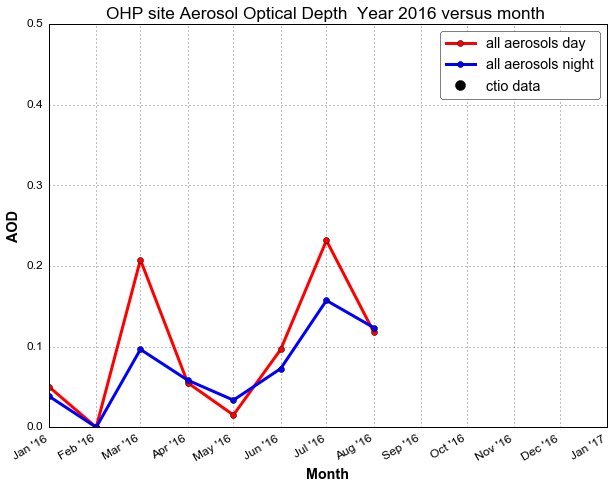

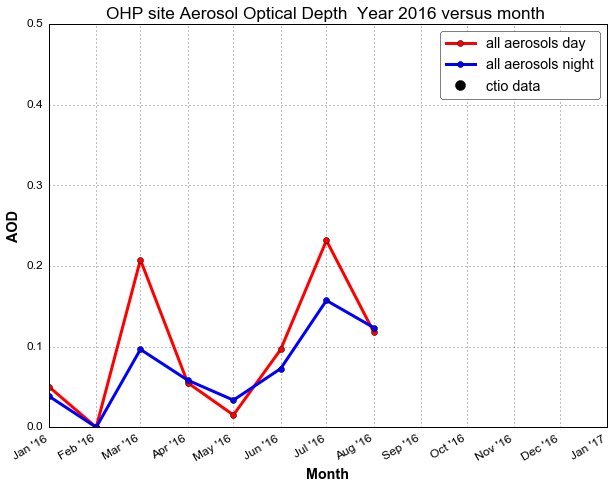

In [37]:
if year_number == 2016:
    
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(1,1,1)

    
    ax.plot_date(dates, all_aod_day,'ro-',label='all aerosols day',linewidth=3)
    ax.plot_date(dates, all_aod_night,'bo-',label='all aerosols night',linewidth=3)

    ax.plot_date(data_dates, data_aod,'ko',markersize=10,label='ctio data')
    
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)
    ax.xaxis.set_minor_locator(mondays)


    title= "OHP site Aerosol Optical Depth  Year %d versus month " % year_number
    figfilename="DATACTIO_OHPAODvsMonthY%d.pdf" %year_number

    ax.set_ylabel('AOD')
    ax.set_xlabel('Month')

    ax.grid(True)
    fig.autofmt_xdate()

    plt.title(title)
    #plt.lines.Line2D.set_linewidth(2.)
    plt.ylim(0,0.5)
    ax.set_xlim(['2016-01-01 00:00:00','2017-01-01 00:00:00'])
    plt.legend(loc='best')
    plt.savefig(figfilename, bbox_inches='tight')
    
    
    
if year_number == 2016:
    
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(1,1,1)

    
    ax.plot_date(dates, all_aod_day,'ro-',label='all aerosols day',linewidth=3)
    ax.plot_date(dates, all_aod_night,'bo-',label='all aerosols night',linewidth=3)

    ax.plot_date(data_dates, data_aod,'ko',markersize=10,label='ctio data')
    
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)
    ax.xaxis.set_minor_locator(mondays)


    title= "OHP site Aerosol Optical Depth  Year %d versus month " % year_number
    figfilename="DATACTIO_OHPAODvsMonthY%d.pdf" %year_number

    ax.set_ylabel('AOD')
    ax.set_xlabel('Month')

    ax.grid(True)
    fig.autofmt_xdate()

    plt.title(title)
    #plt.lines.Line2D.set_linewidth(2.)
    plt.ylim(0,0.5)
    ax.set_xlim(['2016-01-01 00:00:00','2017-01-01 00:00:00'])
    plt.legend(loc='best')
    plt.savefig(figfilename, bbox_inches='tight')   
    
    
    